In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/poorn/Downloads/crime-in-los-angeles/Crime.csv')

In [3]:
dataset=pd.DataFrame(data);

In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date Occurred'])
dataset['month'] = dataset['Date'].dt.strftime('%b')

In [5]:
dataset['year'] = pd.DatetimeIndex(dataset['Date Occurred']).year 

In [6]:
dataset['month'] = pd.Categorical(dataset['month'],categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)

In [7]:
Top5Crimes=dataset.groupby('Crime Code Description')['Area ID'].count().sort_values(ascending=False)
Top5Crimes=Top5Crimes[:5]

In [8]:
crimes=dataset[(dataset['Crime Code Description']=='BATTERY - SIMPLE ASSAULT')|(dataset['Crime Code Description']=='BURGLARY FROM VEHICLE')|(dataset['Crime Code Description']=='VEHICLE - STOLEN')|(dataset['Crime Code Description']=='BURGLARY')|(dataset['Crime Code Description']=='THEFT PLAIN - PETTY ($950 & UNDER)')]

In [11]:
import numpy as np
column_order = ['Jan', 'Feb', 'Mar','Apr', 'May','Jun', 'Jul','Aug', 'Sep', 'Oct','Nov', 'Dec']
heatmap= crimes.pivot_table(values='Area ID', index='Crime Code Description', columns='month', aggfunc=np.size)

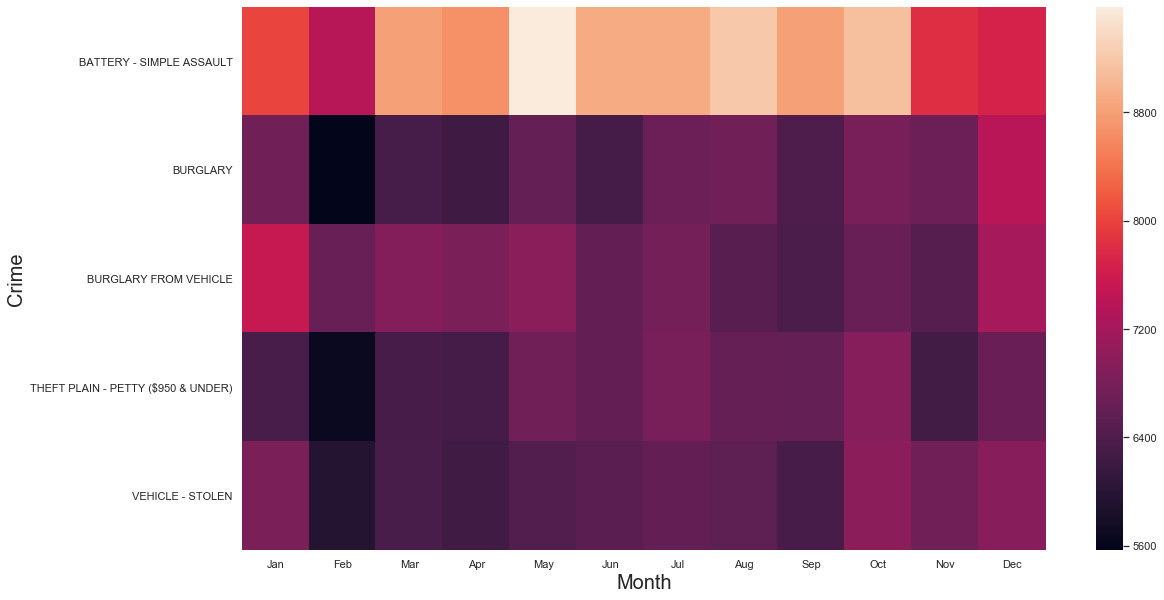

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
conf={'axes.labelsize': 20, 'font.size': 20, 'legend.fontsize': 20, 'axes.titlesize': 32}
sns.set(rc=conf)
plt.subplots(figsize=(18,10))
sns.heatmap(heatmap)
plt.ylabel('Crime')
plt.xlabel('Month')
plt.show()